## Исследование данных о российском кинопрокате



<div style="border:solid Chocolate 2px; padding: 40px">
Заказчик этого исследования — Министерство культуры Российской Федерации.

Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю. 

Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
Цель проекта - исследовательский анализ данных проката фильмов за период 2010 -2019 годов.

Мы узнаем сколько фильмов выходило в прокат каждый год. Хотя данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.
Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной и максимальной.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Узнаем фильмы с каким возрастным ограничением собрали больше всего денег в прокате. Меняется ли картина в зависимости от года. 

Ход исследования:
Данные о данные о прокатных удостоверениях и о о прокате в российских кинотеатрах я получу из файлов соответственно:  /datasets/mkrf_movies.csv  и /datasets/mkrf_shows.csv. О качестве данных ничего не известно. Поэтому перед тем, как приступить к целям исследования, понадобиться обзор данных. Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я найду возможность исправить их, стараясь не искажать исходные данные, чтобы не было искажений в результатах исследования. Далее создам необходимые столбцы и приступлю к исследовательскому анализу. Таким образом мое исследование будет по следующему плану :

План работы.
1.1 Открыть файлы с данными и обьединить их.

1.2 Предобработка данных.

1.2.1 Проверить тип данных.

1.2.2 Изучить пропуски в датафрейме.

1.2.3 Изучить категорийные значения.

1.2.4 Проверить количественые значения.

1.2.5 Добавить новые столбцы.

1.3 Провести исследовательский анализ данных.

1.4.Исследовать фильмы, которые получили государственную поддержку.

1.5 Общий вывод.

Описание данных

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

•	title — название фильма;
•	puNumber — номер прокатного удостоверения;
•	show_start_date — дата премьеры фильма;
•	type — тип фильма;
•	film_studio — студия-производитель;
•	production_country — страна-производитель;
•	director — режиссёр;
•	producer — продюсер;
•	age_restriction — возрастная категория;
•	refundable_support — объём возвратных средств государственной поддержки;
•	nonrefundable_support — объём невозвратных средств государственной поддержки;
•	financing_source — источник государственного финансирования;
•	budget — общий бюджет фильма;
•	ratings — рейтинг фильма на КиноПоиске;
•	genres — жанр фильма
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
•	puNumber — номер прокатного удостоверения;
•	box_office — сборы в рублях.


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Открываем данные о прокатных удостоверениях. Путь к файлу /datasets/mkrf_movies.csv'. Выводим первые строки и информацию о датафрейме. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_id_movia = pd.read_csv('/datasets/mkrf_movies.csv')
display (data_id_movia.head())
data_id_movia.info()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Открываем данные о прокате в российских кинотеатрах. Путь к файлу /datasets/mkrf_movies.csv'. Выводим первые строки и информацию о датафрейме.

In [2]:
data_movie_cinema = pd.read_csv('/datasets/mkrf_shows.csv')
display (data_movie_cinema.head())
data_movie_cinema.info()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Нам нужно обьединить два датафрейма по столбцу puNumber. Поэтому приводим в первом датафрейме этот столбец к типу int64. Сразу это не удается, возможно есть неккоректные значения. Поэтому сначала перводим в строковую переменную, а затем методом to_numeric и с параметром errors = 'coerce' для изменения некорректного значения на Nan.

In [3]:
data_id_movia['puNumber'] = data_id_movia['puNumber'].astype('str')
data_id_movia['puNumber'] = pd.to_numeric(data_id_movia['puNumber'], errors = 'coerce')
data_id_movia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Обьединяем две таблицы по столбцу 'puNumber'. При этом все содержание первой таблицы оставили без изменений назначением параметра how='left'. Проверили это методом info.

In [4]:
data_movia_comb = pd.merge(data_id_movia,data_movie_cinema, on='puNumber',how='left')
data_movia_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [5]:
data_movia_comb.info()
#data_movia_comb.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Изменяем тип данных у столбцов: номер прокатного удостоверения - puNumber на целое число. У название фильма - title на строку.У даты премьеры фильма - show_start_date на дату. У рейтинга на вещественное число, предварительно пропущенные значения заменив на 0. У типа фильма, страны,директора, жанр  на строку. Пропущенные значения в столбцах с типом float refundable_support nonrefundable_support budget  сначала заменели на ноль, для возможности дальнейших арифметичнских действий, но в процессе работы это отразилось на статистике, поэтому отказались от последнего действия (они остались в комментариях).

In [6]:
data_movia_comb['puNumber'] = data_movia_comb['puNumber'].fillna(0)
data_movia_comb['puNumber'] = data_movia_comb['puNumber'].astype('int')
data_movia_comb['title'] = data_movia_comb['title'].astype('str')
data_movia_comb['show_start_date'] = pd.to_datetime(data_movia_comb['show_start_date'])

data_movia_comb['production_country'] = data_movia_comb['production_country'].astype('str')
data_movia_comb['director'] = data_movia_comb['director'].astype('str')
data_movia_comb['ratings'] = data_movia_comb['ratings'].fillna(0)
#data_movia_comb['refundable_support'] = data_movia_comb['refundable_support'].fillna(0)
#data_movia_comb['nonrefundable_support'] = data_movia_comb['nonrefundable_support'].fillna(0)
#data_movia_comb['budget'] = data_movia_comb['budget'].fillna(0)
data_movia_comb['ratings'] = pd.to_numeric(data_movia_comb['ratings'], errors = 'coerce')
data_movia_comb.astype({'genres': 'str'}).dtypes
#data_movia_comb = data_movia_comb.apply(lambda col: col.astype('str') if dtype(col) == object else col)
data_movia_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [7]:
display (data_movia_comb.isna().sum())
display (pd.DataFrame(round(data_movia_comb.isna().mean()*100,)).style.background_gradient('coolwarm'))

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                    29
genres                    976
box_office               4328
dtype: int64

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


Заменяем пропуски в столбце 'producer' на Неизвестный, для возможности участия этих строк в условных операторах и вычислениях. В строке с жанрами пропуски меняем на пробел. Ранее мы убрали пропуски в столбце рейтиг, заменив их на ноль, чтобы первести этот столбец к числовому типу. Некоторые колонки не известны как будут дальше использоваться, поэтому более ничего на этом этапе не меняем.

In [8]:
data_movia_comb['producer'] = data_movia_comb['producer'].fillna('Неизвестный')
data_movia_comb['genres'] = data_movia_comb['genres'].fillna('Неизвестный')
data_movia_comb[data_movia_comb['producer'] =='Неизвестный']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестный,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,Неизвестный,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,Неизвестный,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,Неизвестный,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,Неизвестный,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,Неизвестный,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,Неизвестный,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,Неизвестный,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,Неизвестный,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный",NaN


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [9]:
display (data_movia_comb['title'].value_counts())

День святого Валентина_                                              5
Кошмар на улице Вязов /Фильм ужасов/                                 4
Кошки против собак: Месть Китти Галор                                4
Секс в большом городе 2                                              4
Белоснежка и охотник                                                 4
                                                                    ..
О чем говорят мужчины. Продолжение                                   1
Нежность /По произведению Давида Фонкиноса/                          1
Муза смерти                                                          1
Отмель                                                               1
Концерт Дмитрия Хворостовского и Анны Нетребко на Красной площади    1
Name: title, Length: 6772, dtype: int64

In [10]:
display (data_movia_comb['type'].value_counts())

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Избавляемся от пробела вначале слова.

In [11]:
data_movia_comb['type'] = data_movia_comb['type'].str.strip()
display (data_movia_comb['type'].value_counts())


Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [12]:
display ("film_studio", data_movia_comb['film_studio'].value_counts())
display ("production_country",data_movia_comb['production_country'].value_counts())
display ("director",data_movia_comb['director'].value_counts())

'film_studio'

Киностудия "Мосфильм"                                                                                                                                                   341
ООО "Мульт в кино"                                                                                                                                                       57
Анимаккорд Лтд                                                                                                                                                           23
ООО "Мульт в кино"                                                                                                                                                       18
ФГУП "ТПО "Киностудия "Союзмультфильм"                                                                                                                                   16
                                                                                                                                            

'production_country'

США                                           2172
Россия                                        1821
СССР                                           347
Франция                                        301
Великобритания                                 257
                                              ... 
Россия, Германия, Казахстан, Польша, Китай       1
Канада - Франция - Испания                       1
США - Австралия - Франция                        1
Великобритания - Франция - Бельгия - США         1
СССР                                             1
Name: production_country, Length: 951, dtype: int64

'director'

О.Семёнова                     47
Стивен Содерберг               17
Д.Червяцов                     17
Ридли Скотт                    16
Тиль Швайгер                   14
                               ..
Эндрю Эдамсон, Келли Эсбари     1
Данте Лам                       1
Чан Гуанси, Пэн Фэй             1
Дени Деркур                     1
А.Сахаров                       1
Name: director, Length: 4812, dtype: int64

Во всех категорийных столбцах много разных уникальных значений. Скорее всего придется их разбивать на группы для наглядности анализа.

Ищем явные дупликаты.

In [13]:
data_movia_comb.duplicated().sum()

0

**Явных дупликатов нет.**

Ищем неявные дупликаты.

In [14]:
display (data_movia_comb['puNumber'].duplicated().sum())
data_movia_comb.loc[data_movia_comb['puNumber'].duplicated(), 'puNumber'].unique()
data_movia_comb[data_movia_comb.duplicated('puNumber',keep = False)]

2

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Нашли два неявных дупликата. Удалим второй экземпляр.

In [15]:
data_movia_comb['puNumber'] = data_movia_comb['puNumber'].drop_duplicates()
display (data_movia_comb['puNumber'].duplicated().sum())
data_movia_comb[data_movia_comb.duplicated('puNumber',keep = False)]

1

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,NaN,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,NaN,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

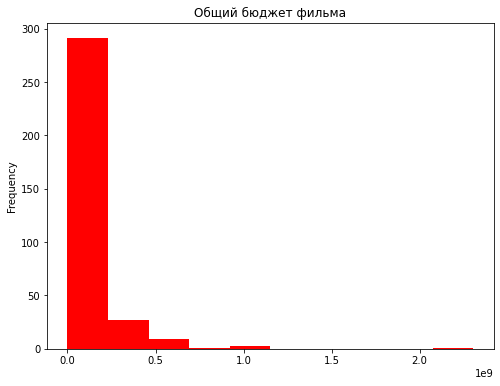

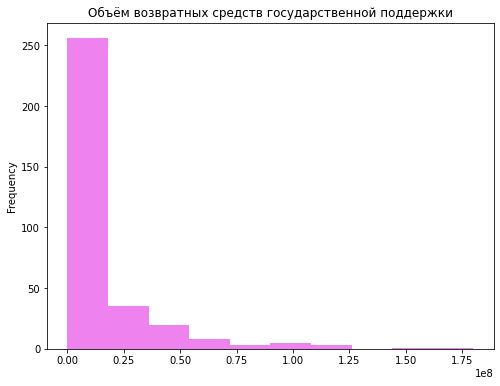

<AxesSubplot:title={'center':'Объём невозвратных средств государственной поддержки'}, ylabel='Frequency'>

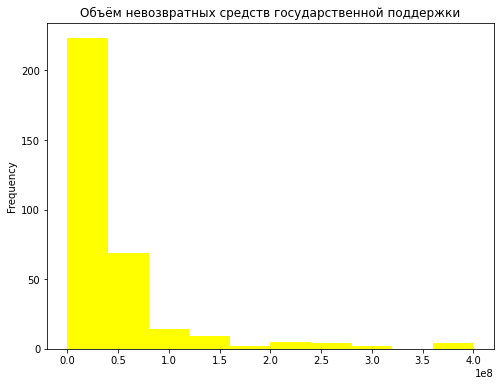

In [16]:
#display ("budget", data_movia_comb['budget'].value_counts())
#display ("refundable_support", data_movia_comb['refundable_support'].value_counts())

data_movia_comb['budget'].plot(kind='hist', figsize=(8, 6), title = 'Общий бюджет фильма', xlabel = 'ось х', ylabel = 'Бюджет',color='red')
plt.show()
data_movia_comb['refundable_support'].plot(kind='hist', figsize=(8, 6), xlabel = 'ось х', ylabel='Средства', title ='Объём возвратных средств государственной поддержки', color = 'violet')
plt.show()
data_movia_comb['nonrefundable_support'].plot(kind='hist', figsize=(8, 6), xlabel = 'ось х', ylabel='Средства', title = 'Объём невозвратных средств государственной поддержки', color = 'yellow')


**У  трех этих величин явная линейная зависимость.**

Проверим не превышает ли где-то сумма государственной поддержки бюджет фильма

In [17]:
data_movia_comb.query('budget < (refundable_support + nonrefundable_support)')                                                                                    

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614.0,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415.0,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315.0,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615.0,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715.0,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215.0,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115.0,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916.0,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216.0,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116.0,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


**Вывели фильмы, где бюджет меньше суммы выделенных государством средств.**                                            

Теперь посмотрим не превышает ли разница между бюджетом и этими средствами оъема возвратных средств.                             

In [18]:
data_movia_comb.query('((refundable_support + nonrefundable_support) - budget)>refundable_support')  

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614.0,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415.0,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315.0,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2615,Савва. Сердце воина,114001715.0,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215.0,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115.0,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916.0,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216.0,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116.0,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09
3675,Чудо-юдо,114001817.0,2017-06-27 12:00:00+00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,20000000.0,20000000.0,0.0,Фонд кино,5.2,"мультфильм,фэнтези,семейный",5.510801e+07


**Такие фильмы тоже есть. Значит надо учтывать эти фильмы для анализа потраченных средств государством.**

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Создаем год проката из столбца show_start_date. Ранее мы в нем поменяли тип обьект на дату.

In [19]:

data_movia_comb['year_start_date'] = pd.DatetimeIndex(data_movia_comb['show_start_date']).year  
#data_movia_comb['show_start_date'].astype('datetime64[M]')
data_movia_comb['year_start_date'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: year_start_date, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

S.split(символ) Разбиение строки по разделителю

In [20]:
display (data_movia_comb['director'].value_counts())
data_movia_comb['genres'].value_counts()

О.Семёнова                     47
Стивен Содерберг               17
Д.Червяцов                     17
Ридли Скотт                    16
Тиль Швайгер                   14
                               ..
Эндрю Эдамсон, Келли Эсбари     1
Данте Лам                       1
Чан Гуанси, Пэн Фэй             1
Дени Деркур                     1
А.Сахаров                       1
Name: director, Length: 4812, dtype: int64

Неизвестный                  976
драма                        476
комедия                      352
мелодрама,комедия            222
драма,мелодрама,комедия      189
                            ... 
драма,фантастика,ужасы         1
документальный,фантастика      1
триллер,мелодрама,драма        1
комедия,биография,история      1
детектив,история,драма         1
Name: genres, Length: 743, dtype: int64

In [21]:
import re
#def selection(row):
#    director = row['director']
#    list_director = re.split(r'[., ]',director)
#    genres = row['genres']
#    list_genres = re.split(r'[., ]',genres)
#    display (list_director[0],list_director[1],list_genres[0])
#    list_def = [list_director[0],list_director[1],list_genres[0]]
#return  list_director[0],list_genres[0]
#data_movia_comb.apply(selection,index = ['first_name_director','genre_new'], axis=1)  
def first_value(s):
    value_lst = re.split(r',',s)
    return value_lst[0]
 
data_movia_comb['genre_new'] = data_movia_comb['genres'].apply(first_value)
data_movia_comb['director_new'] = data_movia_comb['director'].apply(first_value)
display (data_movia_comb.tail())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date,genre_new,director_new
7481,Сад художника: Американский импрессионизм,126008019.0,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,0.0,Неизвестный,NaN,2019,Неизвестный,Фил Грабски
7482,Звериная ярость,121037819.0,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN,2019,боевик,Ник Пауэлл
7483,Щенячий патруль: Скорей спешим на помощь!,124010819.0,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,Неизвестный,NaN,2019,Неизвестный,Чарльз Е.Бастьен
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619.0,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.0,Неизвестный,NaN,2019,Неизвестный,А.Беляев
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719.0,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN,2019,комедия,И.Трусов


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Для определения доли госсударственной поддержки делим сумму объёма возвратных средств государственной поддержки -refundable_support и объёма невозвратных средств государственной поддержки -nonrefundable_support  на столбец общий бюджет фильма - budget 

,budget,nonrefundable_support,refundable_support,calculation
title,,,,
(Не)идеальный мужчина,150147502.0,60000000.0,40000000.0,0.67
12 месяцев. Новая сказка,90120000.0,5000000.0,15000000.0,0.22
28 Панфиловцев,85384000.0,30000000.0,0.0,0.35
30 свиданий,48661150.0,20000000.0,5000000.0,0.51
72 часа,55729424.0,27000000.0,10000000.0,0.66
8 новых свиданий,77401751.0,30000000.0,0.0,0.39
No comment (Нет комментариев),40287770.0,28000000.0,0.0,0.69
Pro любовь,55195000.0,20000000.0,0.0,0.36
Ёлки 5,215162287.0,150000000.0,0.0,0.70


'Общая средняя доля по всем фильмам'

0.52

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'nonrefundable_support'}>],
       [<AxesSubplot:title={'center':'refundable_support'}>,
        <AxesSubplot:title={'center':'calculation'}>]], dtype=object)

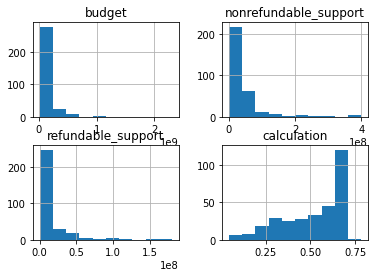

In [22]:
cent = data_movia_comb.query('budget > 0')\
                      .pivot_table(index = 'title', values = ['refundable_support','nonrefundable_support','budget'], aggfunc = 'sum')
cent['calculation']=(cent['nonrefundable_support']+cent['refundable_support'])/cent['budget']
display(round(cent,2).head(25))
display('Общая средняя доля по всем фильмам',round(cent['calculation'].mean(),2))
cent.hist()

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

 Смотрим, сколько фильмов выходило в прокат каждый год.

<AxesSubplot:title={'center':'Сколько фильмов по годам'}, xlabel='год', ylabel='количество фильмов'>

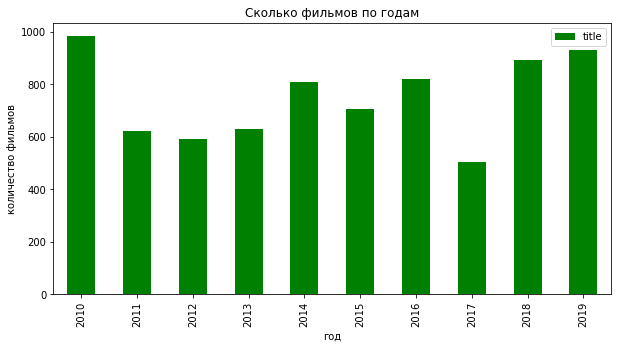

In [23]:
#data_movia_comb.pivot_table(index = 'year_start_date',values = 'type', columns = 'title', aggfunc = 'count',margins=True)
data_movia_comb_count = data_movia_comb.pivot_table(index =['year_start_date'],values = 'title', aggfunc = 'count')

data_movia_comb_count.plot(y='title', kind = 'bar',figsize=(10,5), xlabel = 'год',ylabel = 'количество фильмов', title = 'Сколько фильмов по годам', color = 'green')


Считаем какую долю составляют фильмы с  информацией о прокате в кинотеатрах. Здесь можно создаем столбец box_office_full с булевыми значениями, в кторых True , если есть информация о прокате. Тогда количество по гаждому году узнаем группировкой по годам и используя функцию Sum. Т.к True это 1.
И потом ищем долю как отношение нового столбца box_office_full к длине по нименованию фильма title.

,box_office_full,title,portion
year_start_date,,,
2010,101,985,10.25
2011,109,622,17.52
2012,123,593,20.74
2013,179,630,28.41
2014,273,807,33.83
2015,462,705,65.53
2016,525,818,64.18
2017,357,505,70.69
2018,475,891,53.31


('Общая средняя доля по всем фильмам', 42.14)

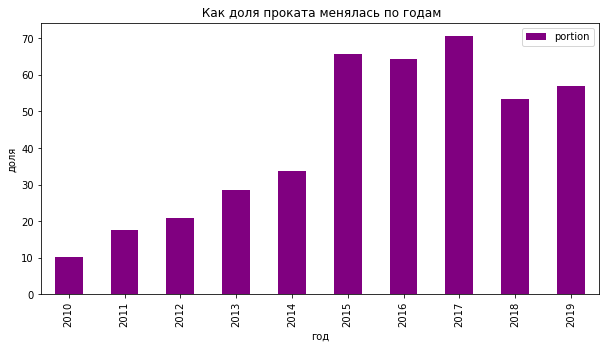

In [24]:
data_movia_comb['box_office_full'] = data_movia_comb['box_office'] > 0
#display (data_movia_comb['box_office_full'].head(50))
year_calculation = data_movia_comb.pivot_table(index = 'year_start_date', values = ['title','box_office_full'], aggfunc = {'title':len,'box_office_full':sum})
year_calculation['portion']=round(year_calculation['box_office_full']/year_calculation['title']*100,2)

display(year_calculation.head(10))
year_calculation.sort_values('year_start_date').plot(y='portion', kind = 'bar',figsize=(10,5), title = ' Как доля проката менялась по годам', xlabel='год', ylabel='доля', color = 'purple')

'Общая средняя доля по всем фильмам',round(year_calculation['portion'].mean(),2)

**Анализируем график ' Как доля информации о прокате менялась по годам'. На основании его самые информативные года 2015,2016, 2017. в 2010 году самые минимальные данные.**

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Для ответа на поставленный вопрос группируем по годам и ищем сумму сборов.

,box_office
year_start_date,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


'Общая средний сбор по всем фильмам'

24151972247.71

'Год с максимальным прокатом'

,box_office
year_start_date,
2018,4.966840e+10


'Год с минимальным прокатом'

,box_office
year_start_date,
2010,2428654.0


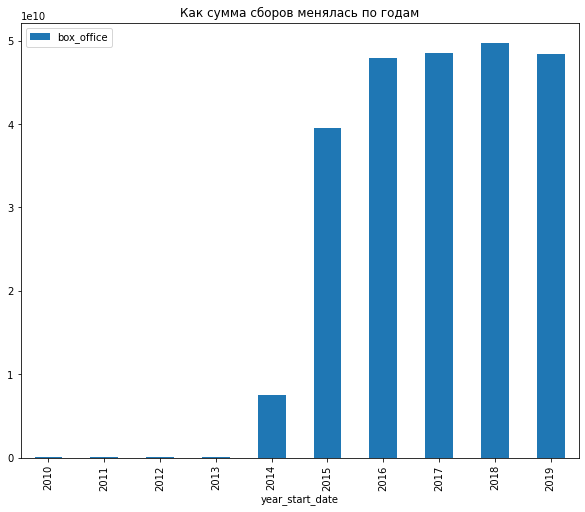

In [25]:
year_calculation = data_movia_comb.query('year_start_date != 0')\
               .pivot_table(index = 'year_start_date', values = ['box_office'], aggfunc = {'box_office':np.sum})
#year_calculation['portion']=round(year_calculation['box_office']/year_calculation['title']*100,2)

display(year_calculation.head(10))
year_calculation.sort_values('year_start_date').plot(y='box_office', kind = 'bar',figsize=(10,8), title = 'Как сумма сборов менялась по годам')

display ('Общая средний сбор по всем фильмам',round(year_calculation['box_office'].mean(),2))
display ('Год с максимальным прокатом') 
display (year_calculation.query('box_office == box_office.max()'))
display ('Год с минимальным прокатом') 
year_calculation.query('box_office == box_office.min()')

**Полнее всего представлены данные в 2017 году. Опрелелили средний общий сбор по всем фильмам и годам 24 151 972 247 руб. Самые максимальные сборы были в 2018 году , около 50 трил. руб. Самые минимальные сборы были с 2010 году,около 2.5 мил руб. **

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

<AxesSubplot:title={'center':'Как  менялось среднее проката по годам'}, xlabel='year_start_date'>

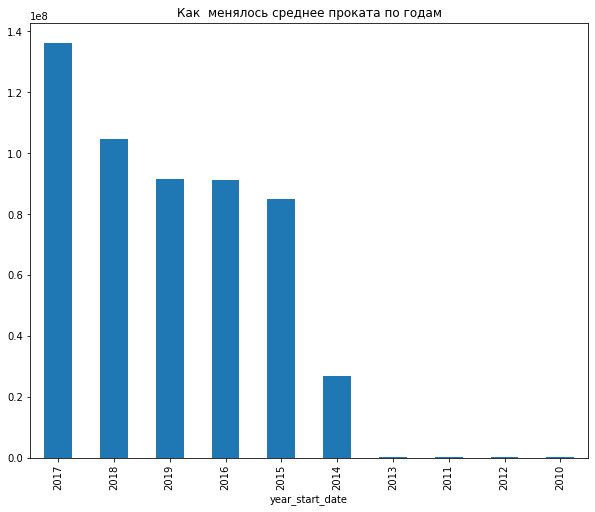

In [26]:
top_yar = data_movia_comb['year_start_date'].value_counts().index.tolist()
data_top_yar =data_movia_comb[data_movia_comb['year_start_date'].isin(top_yar)].groupby('year_start_date')['box_office'].mean().sort_values(ascending=False)
data_top_yar.plot(y='box_office', kind = 'bar',figsize=(10,8), title = 'Как  менялось среднее проката по годам')

<AxesSubplot:title={'center':'Как  менялась медиана проката по годам'}, xlabel='year_start_date'>

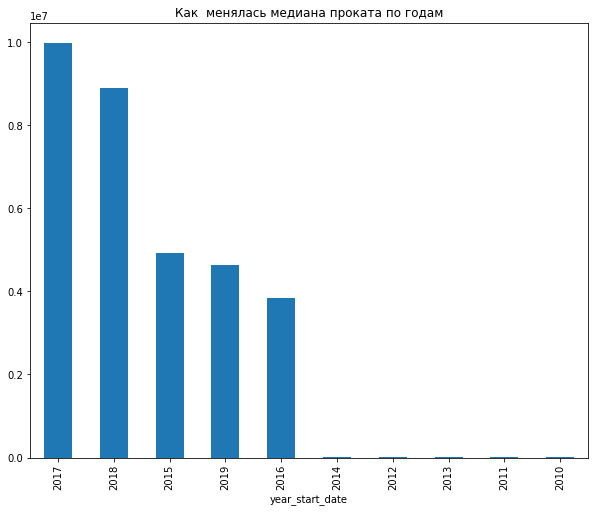

In [27]:
data_top_yar =data_movia_comb[data_movia_comb['year_start_date'].isin(top_yar)].groupby('year_start_date')['box_office'].median().sort_values(ascending=False)
data_top_yar.plot(y='box_office', kind = 'bar',figsize=(10,8), title = 'Как  менялась медиана проката по годам')

**Различие между медийным и средним значением проката по годам существенное только в 2014 году. Это говорит о выбросе значения в этом году.**

Почему выброс связан с 2014 годом? Возможно это было связано с политическими и экономическими событиями в стране.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

['«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«12+» - для детей старше 12 лет',
 '«0+» - для любой зрительской аудитории',
 '«6+» - для детей старше 6 лет']

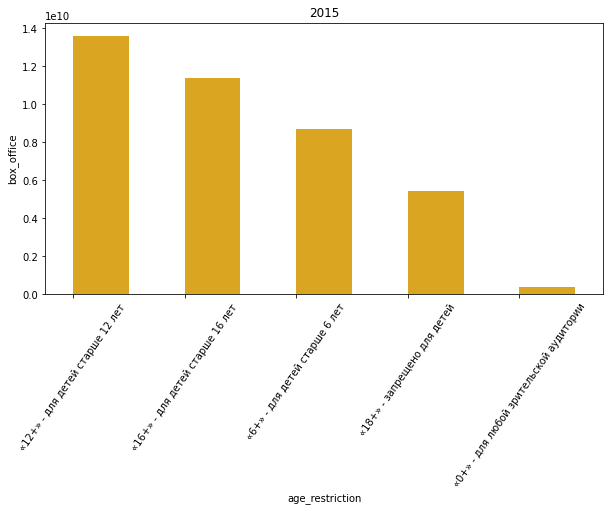

count    5.000000e+00
mean     7.899473e+09
std      5.196115e+09
min      3.790546e+08
25%      5.432308e+09
50%      8.701799e+09
75%      1.136812e+10
max      1.361608e+10
Name: box_office, dtype: float64

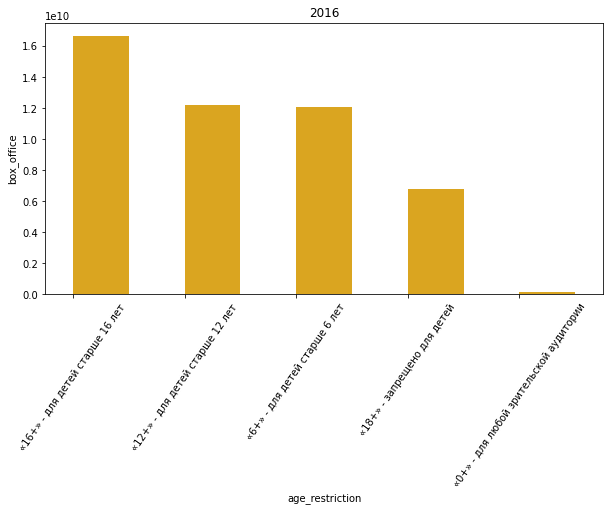

count    5.000000e+00
mean     9.573260e+09
std      6.322135e+09
min      1.502288e+08
25%      6.793930e+09
50%      1.205315e+10
75%      1.220445e+10
max      1.666455e+10
Name: box_office, dtype: float64

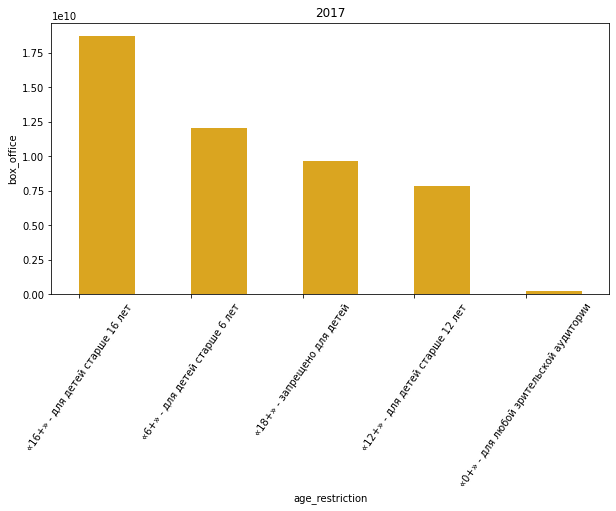

count    5.000000e+00
mean     9.712741e+09
std      6.719630e+09
min      2.295989e+08
25%      7.851428e+09
50%      9.651496e+09
75%      1.208614e+10
max      1.874504e+10
Name: box_office, dtype: float64

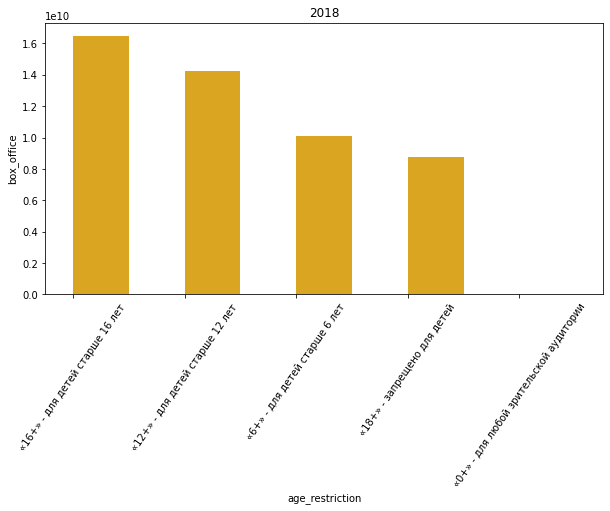

count    5.000000e+00
mean     9.933681e+09
std      6.351872e+09
min      3.244900e+07
25%      8.760086e+09
50%      1.010497e+10
75%      1.426729e+10
max      1.650360e+10
Name: box_office, dtype: float64

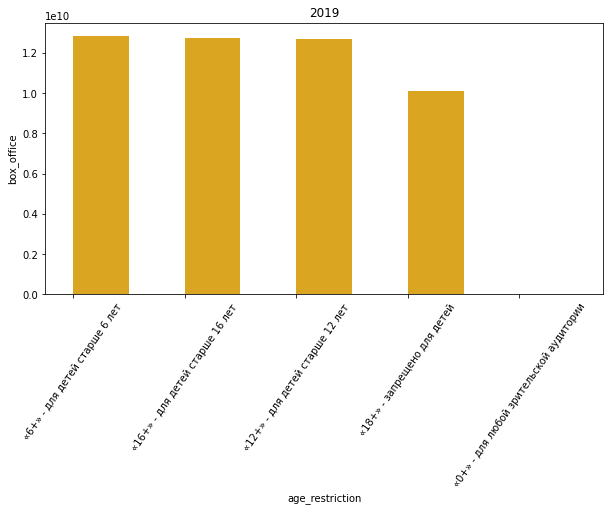

count    5.000000e+00
mean     9.685142e+09
std      5.524182e+09
min      1.774607e+07
25%      1.012180e+10
50%      1.268020e+10
75%      1.275342e+10
max      1.285255e+10
Name: box_office, dtype: float64

In [28]:
top_age = data_movia_comb['age_restriction'].value_counts().index.tolist()
display(top_age)
year_test_list = [2015,2016,2017,2018,2019]
for year_test in year_test_list:
    data_top_age =data_movia_comb[data_movia_comb['age_restriction'].isin(top_age)]\
            .query('year_start_date == @year_test')\
            .groupby('age_restriction')['box_office'].sum().sort_values(ascending=False)
    data_top_age.plot(x='age_restriction', ylabel = 'box_office', figsize=(10,5),kind ='bar', title = year_test,rot = 55,color = 'goldenrod', position = 0)
    plt.show()
    display (data_top_age.describe())


Добавим график со средним.

<AxesSubplot:title={'center':'Медиана по годам'}, xlabel='год', ylabel='сборы'>

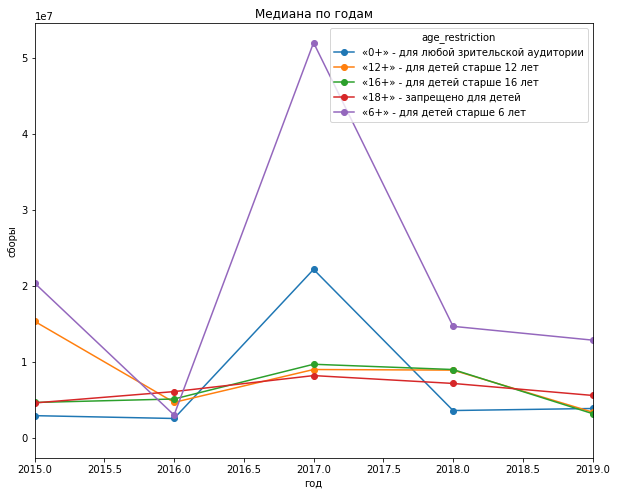

In [29]:
data_movia_comb_sort = data_movia_comb.sort_values(by = 'year_start_date', ascending = False)
data_movia_comb_sort[data_movia_comb_sort['box_office'].notna()]\
               .pivot_table(index = 'year_start_date', columns = 'age_restriction', values = 'box_office', aggfunc = 'median')\
               .plot(xlabel='год', ylabel = 'сборы', figsize=(10,8),style ='-o', title = 'Медиана по годам',\
                xlim =  [2015,2019])

**Анализируя графики с возрастным  ограничением аудитории приходим к выводу, что есть прямая зависимость на сборы этого показателя. Во всех годах лидуруют по сборам фильмы с возрастной группой 6+. В 2019 возрастное ограничение уже на сборы влияет не значительно.**

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Смотрим зависимость окупаемости от государственной поддержки.

<AxesSubplot:xlabel='title'>

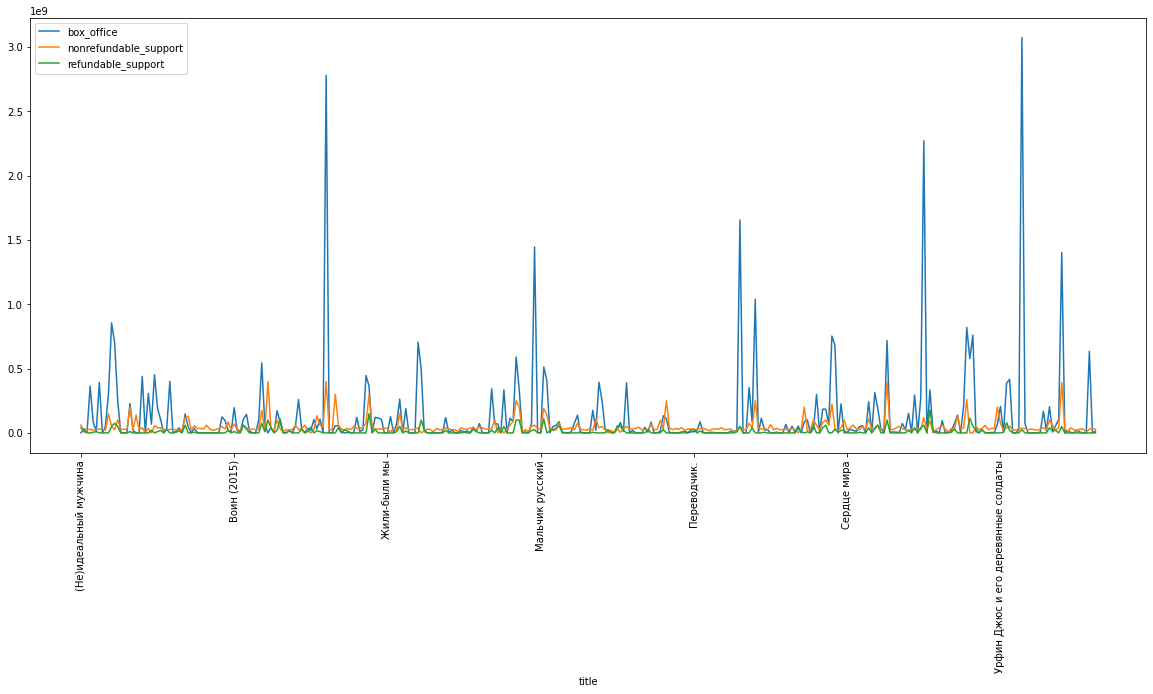

In [30]:
data_movia_comb.query('refundable_support > 0 or nonrefundable_support>0')\
                      .pivot_table(index = 'title', values = ['refundable_support','nonrefundable_support','box_office'],aggfunc = 'sum')\
                      .plot(figsize=(20,8),rot = 90)

**Вывод: На окупаемось фильма судя по графикам государстыенная поддержка имеет незначительное влияние.**

Смотрим зависимость рейтинга от государственной поддержки и сборов.

<AxesSubplot:xlabel='рейтинг'>

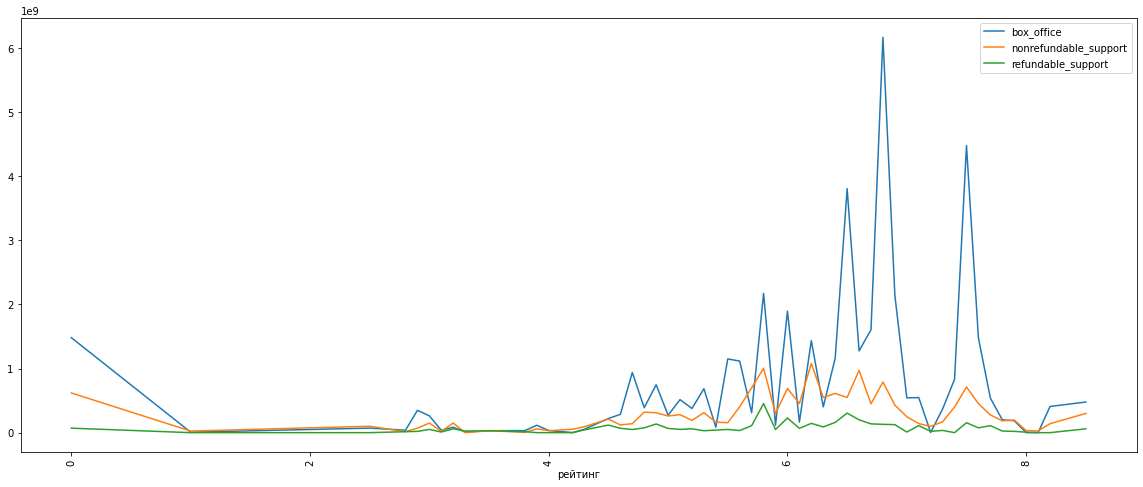

In [31]:
data_movia_comb.query('refundable_support > 0 or nonrefundable_support>0')\
                      .pivot_table(index = 'ratings', values = ['refundable_support','nonrefundable_support','box_office'],aggfunc = 'sum')\
                      .plot(figsize=(20,8),rot = 90,xlabel = 'рейтинг')

**Вывод: На высоких значениях рейтинга видны и значительные сборы от проката. Также на рейтинг влият и государственная поддержка в меньшей мере.**

Смотрим зависимость рейтинга от государственной поддержки и бюджета проката.

<AxesSubplot:xlabel='рейтинг'>

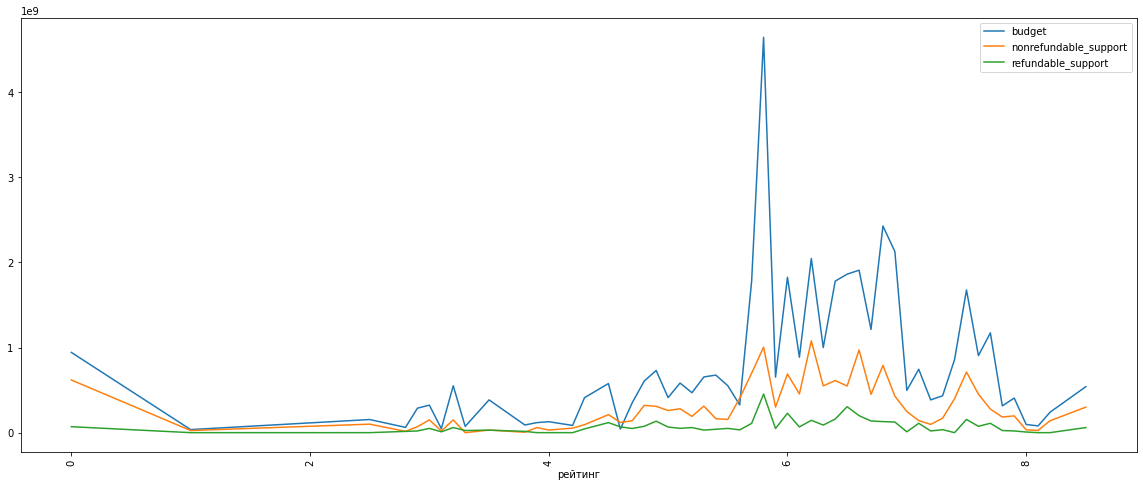

In [32]:
data_movia_comb.query('refundable_support > 0 or nonrefundable_support>0')\
                      .pivot_table(index = 'ratings', values = ['refundable_support','nonrefundable_support','budget'],aggfunc = 'sum')\
                      .plot(figsize=(20,8),rot = 90, xlabel = 'рейтинг')

**Вывод: Также на высоких значениях бюджета видны и значительные сборы от проката.** 

'Смотрим зависимость рейтинга от окупаемости.'

<AxesSubplot:xlabel='рейтинг', ylabel='окупаемость'>

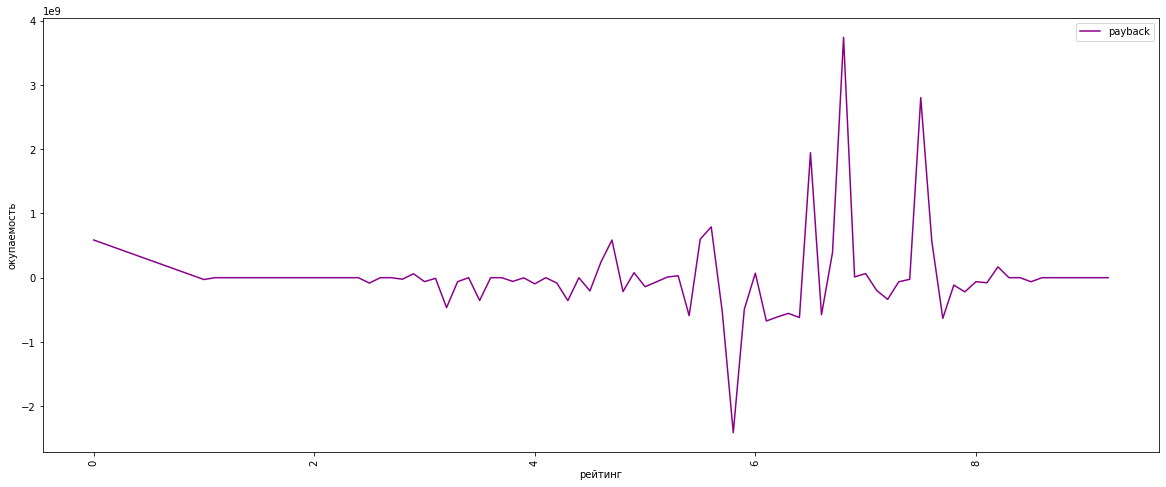

In [33]:
data_movia_comb['payback'] = data_movia_comb['box_office'] - data_movia_comb['budget']
data_movia_comb.pivot_table(index = 'ratings', values = 'payback',aggfunc = 'sum')\
                    .plot(figsize=(20,8),rot = 90, xlabel = 'рейтинг', ylabel = 'окупаемость', color = 'darkmagenta')

**Вывод: Также на высоких значениях окупаемости видны и высокие рейтинги. Есть незначительный провал на значении рейтинга около 6.**

Смотрим рейтингпо режиссерам

<AxesSubplot:xlabel='режиссер', ylabel='рейтинг'>

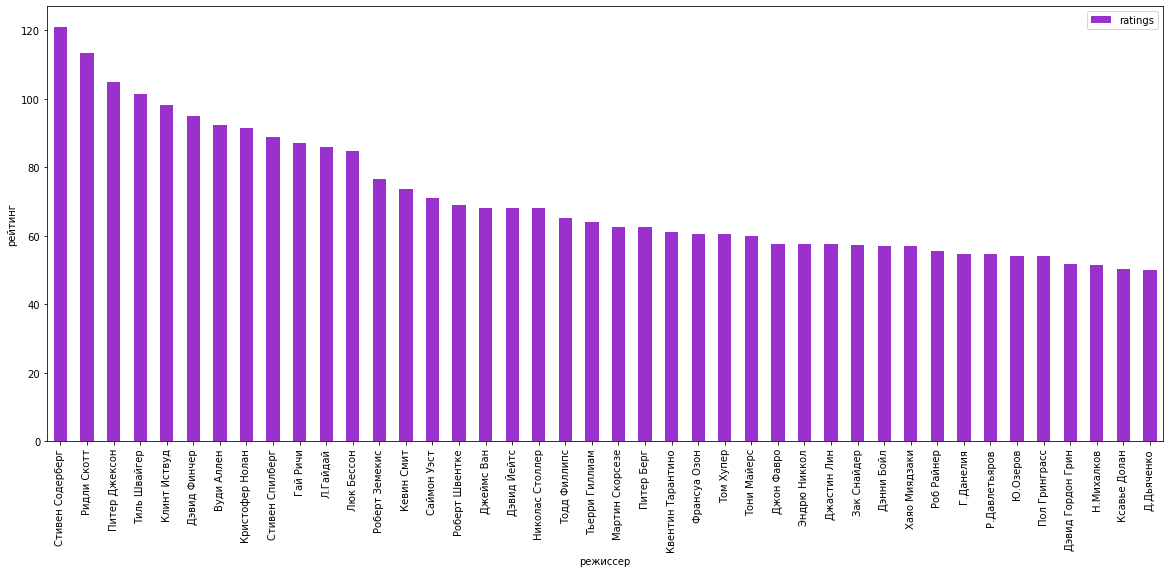

In [34]:
data_movia_comb_dir = data_movia_comb.pivot_table(index = 'director_new', values = 'ratings',aggfunc = 'sum')
data_movia_comb_dir = data_movia_comb_dir.sort_values(by= 'ratings', ascending= False)
data_movia_comb_dir.query('ratings > 50')\
                   .plot(figsize=(20,8),rot = 90, kind = 'bar', xlabel = 'режиссер', ylabel = 'рейтинг', color = 'darkorchid')

**Вывели столбчатую диаграмму рейтинга по режиссерам. Первые позици занимают зарубежные знаменитости.**

Смотрим рейтинг по жанрам

<AxesSubplot:xlabel='жанр', ylabel='рейтинг'>

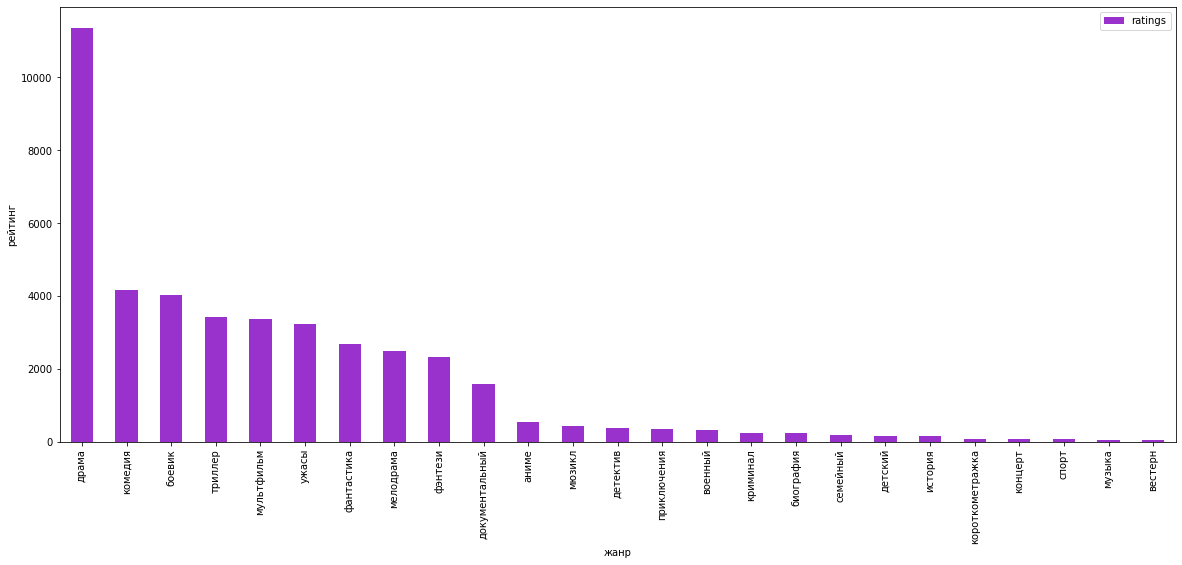

In [35]:
data_movia_comb_genres = data_movia_comb.pivot_table(index = 'genre_new', values = 'ratings',aggfunc = 'sum')
data_movia_comb_genres = data_movia_comb_genres.sort_values(by= 'ratings', ascending= False)
data_movia_comb_genres.query('ratings > 50')\
                   .plot(figsize=(20,8),rot = 90, kind = 'bar', xlabel = 'жанр', ylabel = 'рейтинг', color = 'darkorchid')

**Самый высокий рейтинг у картин с жанром драма.**

### Шаг 5. Напишите общий вывод

<div style="border:solid Chocolate 2px; padding: 40px">
Мы постарались и провели большое исследование отечественного проката на данных 2010-2019 годов.
Мы изучили два датафрейма , опубликованными на портале открытых данных Министерства культуры и с сайта КиноПоиск.
Обьединили два датафрейма по столбцу puNumber. Привили в первом датафрейме этот столбец к типу целого числа.

Изминили типы данных : название фильма -  на строку.У даты премьеры фильма - на дату. У рейтинга на вещественное число, предварительно пропущенные значения заменив на 0. У типа фильма, страны,директора, жанр на строку. Пропущенные значения в столбцах с типом float refundable_support nonrefundable_support budget сначала заменели на ноль, для возможности дальнейших арифметичнских действий, но в процессе работы это отразилось на статистике, поэтому отказались от последнего действия (они остались в комментариях).

Заменили пропуски в столбце 'producer' на Неизвестный, для возможности участия этих строк в условных операторах и вычислениях. В строке с жанрами пропуски поменяли на пробел. Убрали пропуски в столбце рейтиг, заменив их на ноль, чтобы первести этот столбец к числовому типу. 
Исправьте проблемные значения в поле `type`. Избавились от пробелов в начале строковых значений.
Пришли к выводу,что в  категорийных столбцах много разных уникальных значений. 

Создали новые столбцы: год проката,  фамилия и имя режиссера ( убрали последующие значения), жанр (оставили одно первое значение).

Определили долю госсударственной поддержки как отношение суммы объёма возвратных средств государственной поддержки - и объёма невозвратных средств государственной поддержки к общему бюджету фильма. Вывели эти доли по названиям фильмов и рассчитали среднее  по всем фильмам, она составляет 52 процента.

Посмотрели, сколько фильмов выходило в прокат каждый год. Большее количество за 2010 год 985 фильмов, меньшее всего в 2017 505 фильмов. Общее количество за весь исследуемый период 7486.Обратили внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитали, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах - это 42 процента. Проанализировали как эта доля менялась по годам. Полнее всего представлены данные в 2017 году.

Опрелелили средний  общий сбор по всем фильмам и годам 24 151 972 247 руб. Самые максимальные сборы были в 2018 году , они составляют 50 трил. руб . Самые минимальные сборы были с 2010 году, 4.5 мил. руб.

С помощью сводной таблицы посчитали среднюю и медианную сумму сборов для каждого года и вывели для наглядности столбчатые диаграммы.Различие между медийным и средним значением проката по годам существенное только в 2014 году. Это говорит о выбросе значения в этом году.
 Определили, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.
 
 Анализируя графики с возрастным  ограничением аудитории пришли к выводу, что есть прямая зависимость на сборы от возрастного ограничения. Во всех годах лидуруют по сборам фильмы с возрастной группой 6+. В 2019 возрастное ограничение уже на сборы влияет не значительно.
 
Сделали выводы : На окупаемось фильма судя по графикам государстыенная поддержка имеет незначительное влияние.  На высоких значениях рейтинга видны и значительные сборы от проката. Также на рейтинг влият и государственная поддержка в меньшей мере. Также на высоких значениях бюджета видны и значительные сборы от проката. Также на высоких значениях окупаемости видны и высокие рейтинги. Есть незначительный провал на значении рейтинга около 6. 

Самый высокий рейтинг у картин Стива Содерберга и жанра драма.